In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [3]:
data.shape

(119390, 32)

In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
correlation_mat = data.corr()

<ipython-input-5-fc8ac1179bb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = data.corr()


<Axes: >

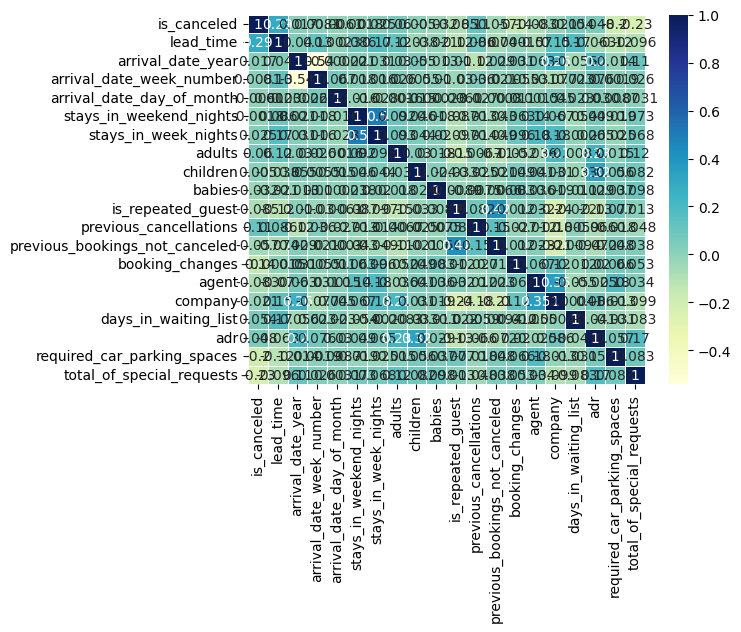

In [6]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

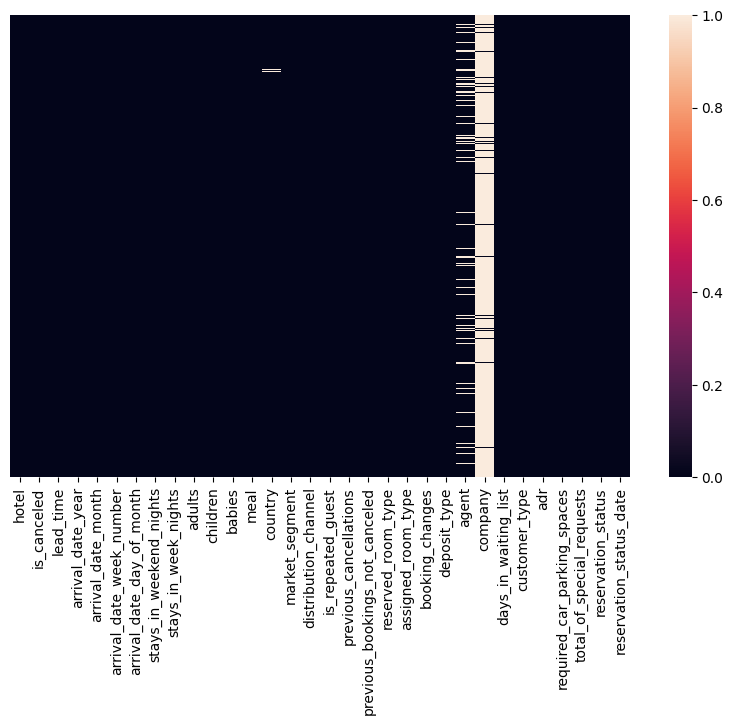

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [9]:
data.drop("company", axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: >

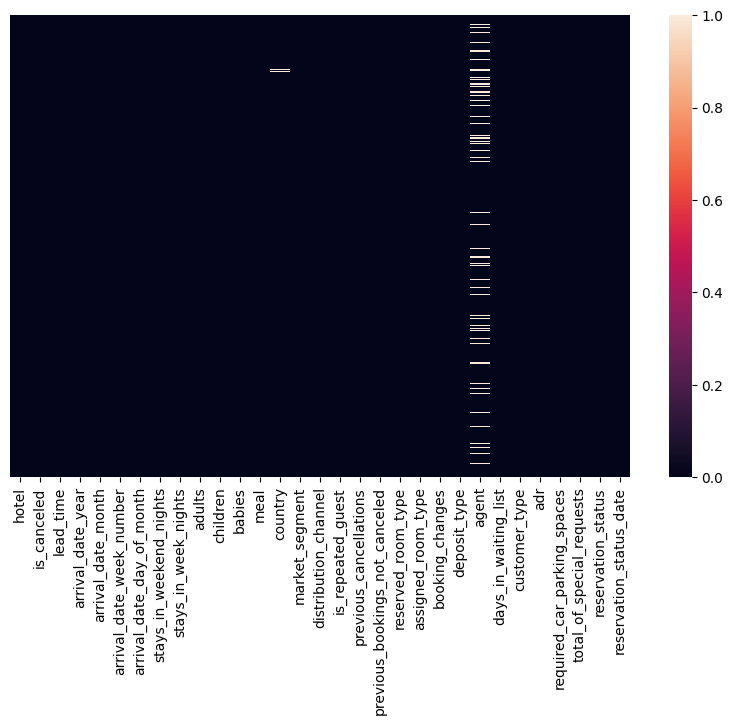

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [11]:
data["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [12]:
data["agent"].replace(np.nan, data["agent"].median(), inplace=True)


In [13]:
data["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [14]:
data["country"].replace(np.nan, data["country"].mode().values[0], inplace=True)

In [15]:
data["children"].replace(np.nan, data["children"].median(), inplace=True)

<Axes: >

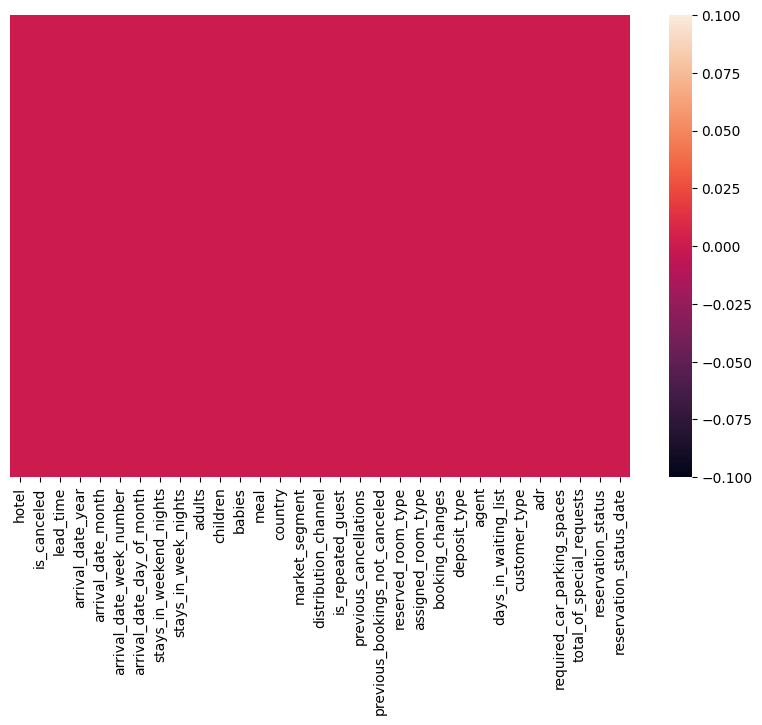

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [17]:
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()
data["hotel"] = lencode.fit_transform(data["hotel"])
data["arrival_date_month"] = lencode.fit_transform(data["arrival_date_month"])
data["meal"] = lencode.fit_transform(data["meal"])
data["country"] = lencode.fit_transform(data["country"])
data["market_segment"] = lencode.fit_transform(data["market_segment"])
data["distribution_channel"] = lencode.fit_transform(data["distribution_channel"])
data["reserved_room_type"] = lencode.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = lencode.fit_transform(data["assigned_room_type"])
data["deposit_type"] = lencode.fit_transform(data["deposit_type"])
data["customer_type"] = lencode.fit_transform(data["customer_type"])
data["reservation_status"] = lencode.fit_transform(data["reservation_status"])
data["reservation_status_date"] = lencode.fit_transform(data["reservation_status_date"])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,14.0,0,2,0.0,0,0,1,190
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,14.0,0,2,0.0,0,0,1,190
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,14.0,0,2,75.0,0,0,1,193
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,193
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,196


In [20]:
X = data.drop(["is_canceled"], axis=1)
y = data["is_canceled"]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(solver="liblinear")
model1.fit(X_train,y_train)
model1.score(X_train,y_train)

0.9899070273892285

In [23]:
model1.score(X_test,y_test)

0.9895091716224139

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
dtree.score(X_train,y_train)

1.0

In [26]:
dtree.score(X_test,y_test)

1.0

In [27]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

1.0


In [28]:
y_predict = dTreeR.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 1])

In [29]:
print(dTreeR.score(X_test, y_test))

1.0


<Axes: >

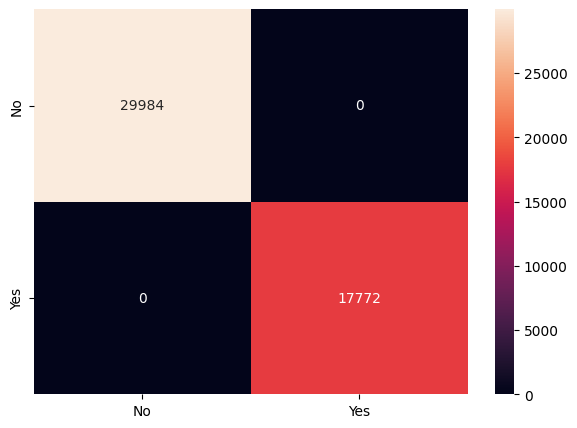

In [30]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [31]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.0


<Axes: >

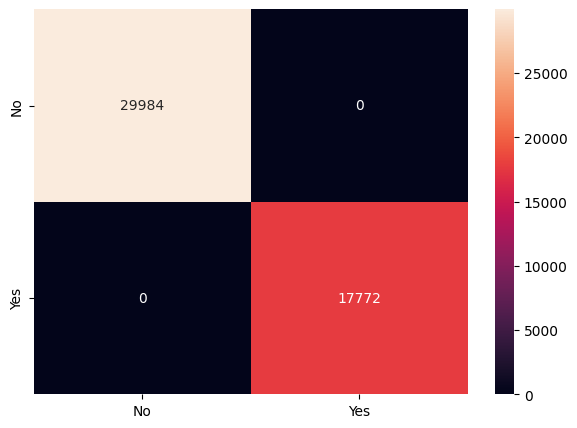

In [32]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [33]:
from sklearn.ensemble import AdaBoostClassifier
acl = AdaBoostClassifier(n_estimators = 120,random_state=0)
acl = acl.fit(X_train, y_train)
y_predict = acl.predict(X_test)
print(acl.score(X_test, y_test))

1.0


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
jbl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
jbl = jbl.fit(X_train, y_train)
y_predict = jbl.predict(X_test)
print(jbl.score(X_test, y_test))


1.0


<Axes: >

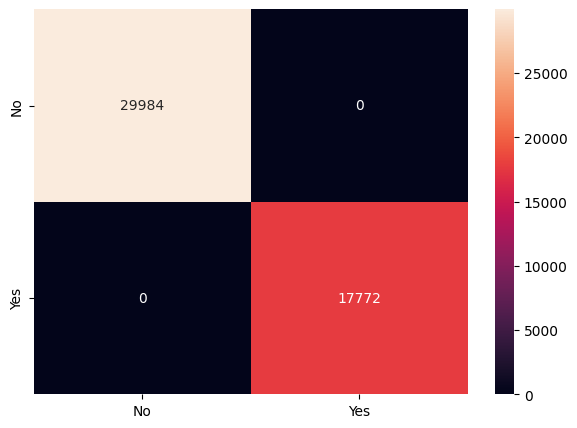

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [36]:
from sklearn.ensemble import RandomForestClassifier
rcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rcl = rcl.fit(X_train, y_train)

0.997717564285116


<Axes: >

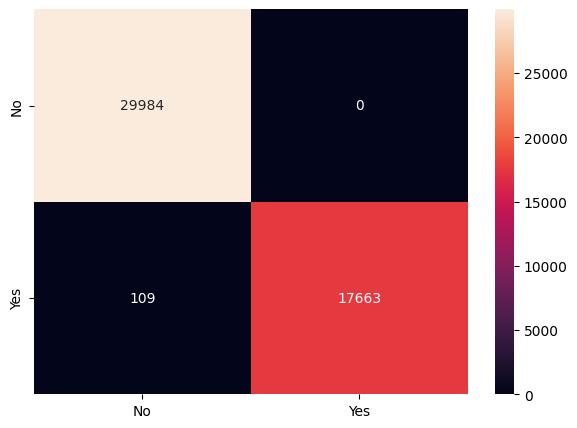

In [37]:
y_predict = rcl.predict(X_test)
print(rcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')